# 7차시 _ 데이터 분석값 배우기
### 산포도

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset

# 타이타닉 데이터셋 로드
titanic = load_dataset('titanic')


# 결측치 처리
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['fare'].fillna(titanic['fare'].median(), inplace=True)

In [25]:
# 성별은 딱 정리되어나오지만
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [26]:
#AGE는 연속형이라 비효율적으로 나온다. ->히스토그램으로 그려줘야한다.
titanic['age'].value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: age, Length: 88, dtype: int64

In [27]:
age_freq = titanic['age'].value_counts().sort_index()
age_freq = titanic['fare'].value_counts().sort_index()

In [28]:
#numpy 히스토그램 패키지 활용 -> 나이 범위를 10개로 쪼갬 (0.42, 8.378....80~)
age_hist, age_bins = np.histogram(titanic['age'], bins = 10)

In [29]:
age_hist

array([ 54,  46, 177, 346, 118,  70,  45,  24,   9,   2], dtype=int64)

In [30]:
age_bins

array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
       64.084, 72.042, 80.   ])

In [34]:
# 히스토그램의 각 bins, hist를 볼 수 있다
print('Age Histogram Bins', age_bins)
print('Age Histogram Counts', age_hist)

plt.figure(figsize = (14,8))

Age Histogram Bins [ 0.42   8.378 16.336 24.294 32.252 40.21  48.168 56.126 64.084 72.042
 80.   ]
Age Histogram Counts [ 54  46 177 346 118  70  45  24   9   2]


<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

fare Histogram Bins [  0.       51.23292 102.46584 153.69876 204.93168 256.1646  307.39752
 358.63044 409.86336 461.09628 512.3292 ]
fare Histogram Counts [732 106  31   2  11   6   0   0   0   3]


<BarContainer object of 10 artists>

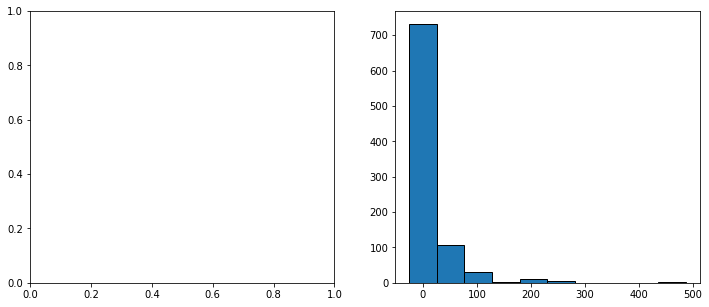

In [37]:
#fare도 추가해서 그리심. bin 값이 732,106에 쏠림 -> 비싼표가 많았다. 왼쪽으로 쏠렸다. 



# 표 두개 시각화 -> 정규분포를 어캐 가져갈건지 잘 생각해야함
# 전처리 과정에서 fare 공식을 바꿀 수도 있다. 
#Age에 대한 도수분포표랑 히스토그램 생성
#numpy 에서 제공하는 histogram
age_hist, age_bins =np.histogram(titanic['age'], bins=10)

fare_hist, fare_bins =np.histogram(titanic['fare'], bins=10)


print('Age Histogram Bins',age_bins)
print('Age Histogram Counts',age_hist)

print('fare Histogram Bins',fare_bins)
print('fare Histogram Counts',fare_hist)


# 시각화를 통해 도수분포표를 그리자
# 2개의 시각화를 통해 확인하자

fig, ax = plt.subplots(1,2, figsize=(12,5))

# Age 히스토그램
ax[0].bar(age_bins[:-1], age_hist, width= np.diff(age_bins), edgecolor ='black')

ax[1].bar(fare_bins[:-1], fare_hist, width= np.diff(fare_bins), edgecolor ='black')


## Effect Size
- 효과크기를 비교하는 Cohen's d 효과크기 계산
- 두 그룹 간의 차이를 수치로 표현하는 것. 차이가 얼마나 큰지를 나타내는 지표
    - 단순한 통계적 유의성(p-value)을 넘어 실질적인 그 차이가 얼마나 의미가 있는지 평가할 때 사용
    
    
- 두 집단의 평균 차이를 표준편차로 나눈 값
- 효과 크기를 계산한 값의 수치를 아래와 같이 판별한다
    - 0.2 미만 : 작은 효과
    - 0.5 : 중간 효과
    - 0.8 이상: 큰 효과

In [16]:
# 타이타닉 데이터의 fare. 생존 여부에 따라 두 그룹을 fare로 비교한다.

# 생존자와 비생존자 출력
!pip install scipy
from scipy.stats import ttest_ind


In [15]:
fare_sur = titanic[titanic['survived'] == 1 ]['fare']
fare_not_sur = titanic[titanic['survived'] == 0 ]['fare']
fare_sur

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: fare, Length: 342, dtype: float64

In [20]:
#cohen's 계산함수 -> 알아만두고 그냥 쓰는것
def cohens_df(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny -2
    pool_std = np.sqrt(((nx-1) * np.std(x, ddof=1) ** 2 + (ny-1) * np.std(y, ddof=1) ** 2) / dof)  # 오타 수정
    d = (np.mean(x) - np.mean(y)) / pool_std
    return d

# Cohen's d 계산
d = cohens_df(fare_sur, fare_not_sur)
print(d)

0.5469100615319403


## 막대그래프
- 막대랑 히스토는 다르다. 얘는 count
- 히스토는 연속값

In [22]:
#이게 시각화되는 것
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

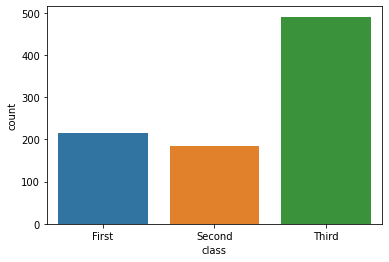

In [21]:
sns.countplot(x = 'class', data = titanic)

## 통계: 산포의 척도 및 두 데이터의 관계
- 통계량을 보고 모수를 추측하는 과정임
- 다 조사하기 어려우니까 모집단 추출해서 표본을 연산하여 전체를 추론하는 과정


- 표준분산에서 왜 n-1이 분모가 되는가? 
    - 모분산에서는 n인데! 자유도 때문. 
    - 자유도가 뭔데?? 안에 데이터가 하나 더 들어감. 
    - 표본 평균이 하나 더들어가서 시그마에서 n-1을 하나 더빼줘야함
    - X바는 모분산의 통계지 데이터의 값이 아니라 빼줌
    - 다른관점으로는 표본평균에서 표준편차를 빼주는 과정임.마지막 끝값의 경우 앞에 있는 것들 때문에 정해져있고 평균의 한계로 마지막값은 그냥 정해져있음. 앞선 편차들의 값으로 인해 편차의 값이 0이 되어야함. 어짜피 뭘해도 끝값이 0이니 n-1로 마지막 값을 빼주는 것 -> 편차 다합치면 0이 되어야함. 자유롭게 움직일 수 있는 편차는 마지막 값제외 n-1 개임
    - 독립적으로 취할 수 있는 변수 측면. 편차에서 합하면 0. 어떤 끝 값은 0이 되는 수로 정해져야함 -> 자유도를 잃으니 n-1개가 되어야한다. 
    
    
#### 산포란
- 데이터가 얼마나 퍼져있는가를 나타내는 지표

### 공식 볼 때
- x가 관측치, x바가 모평균(등등 예측치)

### 편차
- 편차는 각 데이터의 포인트와 데이터 세트의 평균과 차이
- 편차의 합은 항상 0이 되어야 한다. 

### 분산
- 편차의 제곱의 합을 자료의 수로 나눈 값
- 통계량이면 편차제곱의 합을 자유도(n-1)로 나눈 값
- 모분산과 표본분산의 차이를 꼭 알아야함
- 평균 중심으로 데이터가 얼마나 흩어진지를 계산하는 것이구나! 정도 알아주면 됨

### 표준 편차
- 분산 양의 제곱근. 분산이 제곱이므로 루트 씌워주기
- 모표준편차, 표본표준편차. 일부만 추려서 해주는 것. 


### 범위
- 최대 자료에서 최소 자료를 뺀 값
- R = Xmax - Xmin
    - 막상 최대 - 최소를 단순히 빼버리면 이상치, 극단치의 영향을 많이 받게 된다.


### 변동계수
- 표준편차를 평균적으로 나눈 크기

### 상관관계 척도
- 공분산과 상관 계수
- 선형적 관계를 강도와 방향으로 측정하는 지표. 양방향, 음방향.
- 강도는 기울기. 값의 절대치로 보면된다
- 어려운 부분도 표본 공분산인 경우도 많다. 평균에서 표본치를 뺀다. 
    - (예측치 - 평균값) * (생존관측치 - 생존여부)
    
- 상관 지표를 나타내는 것이 공분산과 상관계수

- 오늘은 공분산 까지
### 공분산
- 두 변수의 편차를 곱하여 합한 값을 자료 수로 나눈 것.
- 공분산이 일종의 면적이라고 하는 경우가 있음 : 각각 관측치와 기대치를 빼고 지표를 찍으면 도형이 된다. 